In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

In [ ]:
image1 = Image.open('1.gif')
#image1 = image1.resize((512, 512))
array1 = np.array(image1)
print(array1.size)
print(array1[25][42])

262144
6


In [ ]:
image2 = Image.open('2.gif')
image2 = image2.resize((512, 512))
array2 = np.array(image2)
print(array2[25][42])

9


In [ ]:
image3 = Image.open('3.gif')
image3 = image3.resize((512, 512))
array3 = np.array(image3)
print(array3)

[[12 15 12 ... 13 13 14]
 [12 13 14 ... 16 18 14]
 [12 12 13 ... 17 18 14]
 ...
 [ 9  9  7 ...  6  5  7]
 [10 11 10 ...  6  5  7]
 [11 15 15 ...  6  5  6]]


In [ ]:
image4 = Image.open('4.gif')
image4 = image4.resize((512, 512))
array4 = np.array(image4)
print(array4)

[[28 27 26 ... 18 19 19]
 [29 29 28 ... 19 19 19]
 [29 29 27 ... 21 19 19]
 ...
 [19 17 19 ...  8 13 10]
 [23 19 21 ...  9 17  8]
 [25 24 24 ... 11 17  8]]


In [ ]:
river_points = pd.read_excel('data_river.xlsx',header=None)
np.resize(river_points,(2,50))
river_points = river_points.transpose()
river_points.rename(columns={river_points.columns[0]: 'x',river_points.columns[1]: 'y'},inplace=True)
l1=[1 for i in range(len(river_points['x']))]
river_points['case']=l1

print(river_points)

river_points['x']=river_points['x']-1
river_points['y']=river_points['y']-1
river_points

In [ ]:
nonriver_points = pd.read_excel('data_nonriver.xlsx',header=None)
np.resize(nonriver_points,(2,50))
nonriver_points = nonriver_points.transpose()
nonriver_points.rename(columns={nonriver_points.columns[0]: 'x',nonriver_points.columns[1]: 'y'},inplace=True)
l0=[0 for i in range(len(nonriver_points['x']))]
nonriver_points['case']=l0
nonriver_points
nonriver_points['x']=nonriver_points['x']-1
nonriver_points['y']=nonriver_points['y']-1

In [ ]:
river_points = np.array(river_points)

In [ ]:
nonriver_points = np.array(nonriver_points)

In [ ]:
result = np.concatenate((nonriver_points, river_points))

In [ ]:
result[0][:2]
row,col= np.shape(result)
pixel_matrix = []
for i in range(row):
    x,y,c=result[i][:3]
    lst = [array1[x][y],array2[x][y],array3[x][y],array4[x][y],c]
    pixel_matrix.append(lst)

[[5, 7, 9, 18, 0],
 [3, 5, 6, 13, 0],
 [8, 9, 13, 25, 0],
 [7, 9, 14, 19, 0],
 [10, 12, 14, 20, 0],
 [8, 9, 14, 17, 0],
 [6, 8, 10, 28, 0],
 [6, 7, 11, 17, 0],
 [5, 9, 12, 22, 0],
 [7, 8, 12, 24, 0],
 [7, 9, 13, 30, 0],
 [8, 8, 13, 16, 0],
 [6, 7, 6, 19, 0],
 [8, 9, 14, 20, 0],
 [6, 8, 7, 9, 0],
 [8, 10, 13, 28, 0],
 [7, 8, 10, 30, 0],
 [10, 11, 15, 15, 0],
 [8, 9, 10, 20, 0],
 [8, 9, 15, 13, 0],
 [7, 8, 13, 14, 0],
 [6, 8, 11, 18, 0],
 [3, 5, 6, 16, 0],
 [4, 6, 9, 17, 0],
 [5, 7, 8, 18, 0],
 [6, 8, 11, 20, 0],
 [8, 9, 13, 25, 0],
 [5, 7, 6, 26, 0],
 [10, 10, 12, 27, 0],
 [10, 10, 12, 26, 0],
 [9, 8, 10, 23, 0],
 [6, 7, 11, 19, 0],
 [7, 9, 11, 20, 0],
 [5, 7, 7, 25, 0],
 [3, 6, 7, 21, 0],
 [6, 8, 8, 37, 0],
 [9, 9, 13, 19, 0],
 [9, 10, 11, 30, 0],
 [8, 10, 14, 24, 0],
 [11, 15, 20, 30, 0],
 [12, 11, 13, 23, 0],
 [7, 9, 11, 23, 0],
 [8, 9, 11, 22, 0],
 [5, 8, 10, 22, 0],
 [5, 6, 9, 19, 0],
 [9, 12, 14, 22, 0],
 [7, 8, 10, 20, 0],
 [4, 6, 6, 15, 0],
 [7, 8, 13, 24, 0],
 [6, 8, 8, 25, 0],

In [ ]:
import math
dists=[]
for i in range(150):
    p1,p2,p3,p4 = pixel_matrix[i][:4]
    dists.append(math.sqrt((float(p1) - float(array1[24][41]))**2 + (float(p2) - float(array2[24][41]))**2 + (float(p3) - float(array3[24][41]))**2 + (float(p4) - float(array4[24][41]))**2))
dists
dis_frames=pd.DataFrame()
dis_frames['dists']=dists
l=l0+l1
dis_frames['case']=l
dis_frames = dis_frames.sort_values(by = ['dists'])
k = 5

count_0=list(dis_frames['case'].head(k)).count(0)
count_1=list(dis_frames['case'].head(k)).count(1)
print("river" if count_0 < count_1 else "not river")

not river


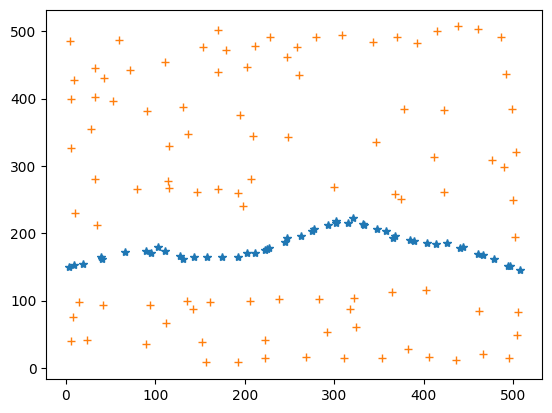

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(river_points[:,0])
ypoints = np.array(river_points[:,1])

plt.plot(xpoints, ypoints, '*')

xpoints = np.array(nonriver_points[:,0])
ypoints = np.array(nonriver_points[:,1])
plt.plot(xpoints, ypoints, '+')
plt.show()

In [ ]:
import math
from collections import OrderedDict
river_matrix = np.zeros((512,512))
for i in range(512):
    for j in range(512):
        dists = []
        for v in range(150):
            p1,p2,p3,p4 = pixel_matrix[v][:4]
            dists.append(math.sqrt((float(p1) - float(array1[i][j]))**2 + (float(p2) - float(array2[i][j]))**2 + (float(p3) - float(array3[i][j]))**2 + (float(p4) - float(array4[i][j]))**2))
        s = np.array(dists)
        sort_index = np.argsort(s)

        count0 = 0
        count1 = 0
        for vi in range(k):
          if(sort_index[vi] < 100):
            count0 += 1
          else:
            count1 += 1

        if count0 < count1:
          river_matrix[i][j] = 1
        else:
          river_matrix[i][j] = 0



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

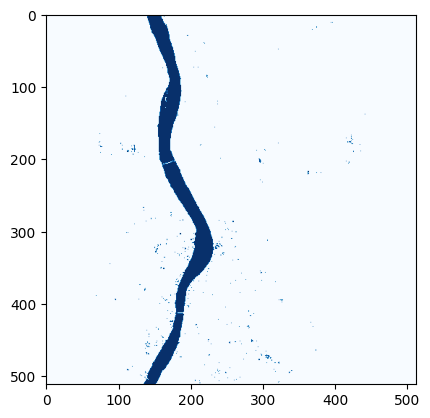

In [ ]:
plt.imshow(river_matrix, cmap='Blues')

In [ ]:
count=0
for i in range(150):
  x,y,cs = result[i][:3]
  if(river_matrix[x][y]==cs):
    count+=1
print((count/150)*100,"accurate")


100.0 accurate
